In [1]:
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\awot1\Downloads/'



In [2]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\awot1\\Downloads\\Crimes_-_2001_to_Present.csv'

In [3]:
import gc
gc.collect()

3

In [4]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [5]:
import pandas as pd
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883246,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7883247,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
7883248,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,...,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"
7883249,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,08/19/2023 03:40:26 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"


In [6]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
4250332,3769790,HL141452,01/01/2001 01:00:00 PM,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,...,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)",2001-01-01 01:00:00
2453889,1311123,G001792,01/01/2001 01:00:00 AM,022XX W 21 ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1161720.0,1890066.0,2001,08/17/2015 03:03:40 PM,41.854014,-87.681909,"(41.854014083, -87.681908988)",2001-01-01 01:00:00
105070,1325760,G001074,01/01/2001 01:00:00 PM,029XX S CALIFORNIA AV,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,...,NaN,18,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-01-01 01:00:00
5958434,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)",2001-01-01 01:00:00
1159475,1319931,G001079,01/01/2001 01:00:00 PM,060XX S ARTESIAN AV,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,NaN,08B,1161114.0,1864508.0,2001,09/07/2021 03:41:02 PM,41.783892,-87.684841,"(41.783892488, -87.684841225)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114960,13193650,JG403958,08/30/2023 12:00:00 AM,057XX W OHIO ST,0810,THEFT,OVER $500,STREET,False,False,...,25.0,06,1138056.0,1903400.0,2023,09/06/2023 03:41:33 PM,41.891064,-87.768444,"(41.891064187, -87.768443992)",2023-08-30 12:00:00
115297,13193026,JG403252,08/30/2023 12:00:00 AM,011XX S TROY ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,...,29.0,04A,1155533.0,1894984.0,2023,09/06/2023 03:41:33 PM,41.867636,-87.704486,"(41.867636169, -87.704485536)",2023-08-30 12:00:00
115011,13193535,JG403719,08/30/2023 12:00:00 AM,044XX W HARRISON ST,0479,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",APARTMENT,True,True,...,26.0,04B,1146955.0,1897110.0,2023,09/06/2023 03:41:33 PM,41.873638,-87.735923,"(41.873638286, -87.735922759)",2023-08-30 12:00:00
114840,13193784,JG404311,08/30/2023 12:00:00 AM,048XX S LAKE PARK AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,39.0,07,1186842.0,1873319.0,2023,09/06/2023 03:41:33 PM,41.807499,-87.590234,"(41.807499342, -87.590234482)",2023-08-30 12:00:00


In [7]:
#Separate the Full Dataset by Years
chicago_full['Datetime'].dt.year

4250332    2001
2453889    2001
105070     2001
5958434    2001
1159475    2001
           ... 
114960     2023
115297     2023
115011     2023
114840     2023
115201     2023
Name: Datetime, Length: 7883251, dtype: int64

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486807
2001    485886
2003    475985
2004    469422
2005    453773
2006    448179
2007    437086
2008    427183
2009    392827
2010    370514
2011    351993
2012    336320
2013    307537
2014    275789
2016    269825
2017    269103
2018    268901
2015    264788
2019    261330
2022    238892
2020    212202
2021    208832
2023    170077
Name: Year, dtype: int64

In [10]:

## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,2001,41.854014,-87.681909
2001-01-01 01:00:00,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,2001,NaN,NaN
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,2001,41.783892,-87.684841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 12:00:00,13193650,08/30/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1512,15.0,29.0,2023,41.891064,-87.768444
2023-08-30 12:00:00,13193026,08/30/2023 12:00:00 AM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,1134,11.0,24.0,2023,41.867636,-87.704486
2023-08-30 12:00:00,13193535,08/30/2023 12:00:00 AM,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",APARTMENT,True,True,1131,11.0,28.0,2023,41.873638,-87.735923


In [12]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [13]:
FINAL_DROP = ['Year']

In [14]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [15]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [16]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [17]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
1,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
3,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
4,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
...,...,...,...,...,...,...,...,...,...,...,...,...
170072,13193650,08/30/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1512,15.0,29.0,41.891064,-87.768444
170073,13193026,08/30/2023 12:00:00 AM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,1134,11.0,24.0,41.867636,-87.704486
170074,13193535,08/30/2023 12:00:00 AM,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",APARTMENT,True,True,1131,11.0,28.0,41.873638,-87.735923
170075,13193784,08/30/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,222,2.0,4.0,41.807499,-87.590234


In [18]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437086
2008    427183
2009    392827
2010    370514
2011    351993
2012    336320
2013    307537
2014    275789
2015    264788
2016    269825
2017    269103
2018    268901
2019    261330
2020    212202
2021    208832
2022    238892
2023    170077
Name: Date, dtype: int64

In [19]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [20]:
df1=df.copy()

In [21]:
df1.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
1,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
3,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
4,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841


In [22]:
df1['Date'].unique()

array(['01/01/2001 01:00:00 PM', '01/01/2001 01:00:00 AM',
       '01/01/2001 01:00:39 PM', ..., '08/29/2023 12:58:00 AM',
       '08/29/2023 12:59:00 AM', '08/30/2023 12:00:00 AM'], dtype=object)

In [23]:
import datetime as dt

In [24]:
#Add a datetime column based on the string in the "date" column
df1['datetime'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7883251 entries, 0 to 170076
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  object        
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 736.8+ MB


In [25]:
df1 = df1.set_index('datetime')
df1

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
datetime,,,,,,,,,,,,
2001-01-01 13:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2001-01-01 13:00:00,1325760,01/01/2001 01:00:00 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN
2001-01-01 13:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
2001-01-01 13:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 00:00:00,13193650,08/30/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1512,15.0,29.0,41.891064,-87.768444
2023-08-30 00:00:00,13193026,08/30/2023 12:00:00 AM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,1134,11.0,24.0,41.867636,-87.704486
2023-08-30 00:00:00,13193535,08/30/2023 12:00:00 AM,BATTERY,"AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY",APARTMENT,True,True,1131,11.0,28.0,41.873638,-87.735923


In [34]:
# Which district has the most crimes? Which has the least?
crime_counts=df1['Primary Type'].value_counts()
crime_counts

THEFT                                1663593
BATTERY                              1439899
CRIMINAL DAMAGE                       898725
NARCOTICS                             749395
ASSAULT                               515894
OTHER OFFENSE                         489321
BURGLARY                              427055
MOTOR VEHICLE THEFT                   386191
DECEPTIVE PRACTICE                    351561
ROBBERY                               296310
CRIMINAL TRESPASS                     215951
WEAPONS VIOLATION                     109848
PROSTITUTION                           69910
OFFENSE INVOLVING CHILDREN             56474
PUBLIC PEACE VIOLATION                 52660
SEX OFFENSE                            31309
CRIM SEXUAL ASSAULT                    27583
INTERFERENCE WITH PUBLIC OFFICER       18579
LIQUOR LAW VIOLATION                   14972
GAMBLING                               14623
ARSON                                  13443
HOMICIDE                               12816
CRIMINAL S

In [35]:
df["District"].value_counts()

8.0     529382
11.0    505263
6.0     461037
7.0     454535
25.0    448125
4.0     447532
3.0     399774
12.0    391448
9.0     384801
2.0     373745
19.0    354685
18.0    354213
5.0     348966
10.0    339694
15.0    336922
1.0     320053
14.0    304700
16.0    264138
22.0    258223
24.0    238577
17.0    227475
20.0    139665
31.0       247
21.0         4
Name: District, dtype: int64

Text(0.5, 0, 'Number of Crimes')

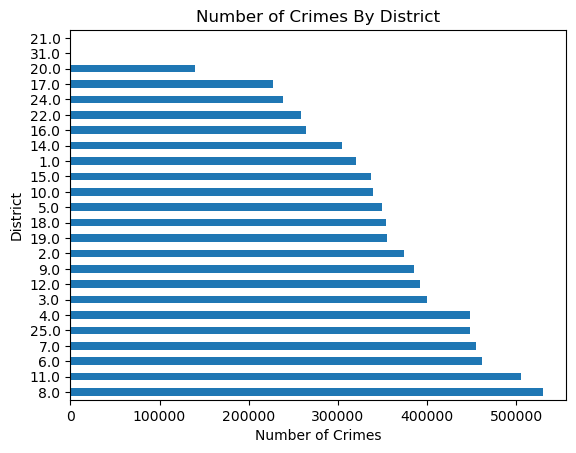

In [32]:
ax = df["District"].value_counts().plot(kind = "barh")
ax.set_title("Number of Crimes By District")
ax.set_ylabel("District")
ax.set_xlabel("Number of Crimes")

district 8 has the highest crime

In [38]:
df_highest = df["District"] == 8
df_highest.value_counts()

False    7353869
True      529382
Name: District, dtype: int64

In [40]:
df_low = df["District"] == 21
df_low.value_counts()

False    7883247
True           4
Name: District, dtype: int64

as we can see, district 21 has the lowest crime

# Topic 2) Crimes Across the Years:Is the total number of crimes increasing or decreasing across the years?Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [42]:
df1 = df.copy()
df1["Date"] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7883251 entries, 0 to 170076
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 676.6+ MB


In [49]:
df1.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
0,3769790,2001-01-01 13:00:00,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000,True
1,1311123,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,True
2,1325760,2001-01-01 13:00:00,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,GOVERNMENT BUILDING/PROPERTY,True,False,1033,10.0,NaN,NaN,NaN,True
3,6808288,2001-01-01 13:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632,True
4,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,True


In [46]:
df1["Crime"] = True

In [51]:
df1 = df1.set_index('Date')

In [53]:
df1.head(2)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,,,,
2001-01-01 13:00:00,3769790,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,41.673171,-87.638000,True
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,True


In [55]:
 df2=df1.groupby("Primary Type").resample("Y").sum()

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2081177419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df1.groupby("Primary Type").resample("Y").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2081177419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df1.groupby("Primary Type").resample("Y").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2081177419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2081177419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df1.groupby("Primary Type").resample("Y").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2081177419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df1.groupby("Primary Type").resample("Y").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2081177419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

In [56]:
df2.head(2)

ID  Arrest  Domestic     Beat  District  \
Primary Type Date                                                          
ARSON        2001-12-31  1635830865     181        60  1247579   11870.0   
             2002-12-31  2288357434     156        72  1287303   12169.0   

                            Ward      Latitude     Longitude  Crime  
Primary Type Date                                                    
ARSON        2001-12-31    103.0  42047.307400 -88118.160187   1011  
             2002-12-31  15924.0  40922.433732 -85752.010876   1032

In [58]:
df2 = df2.unstack("Primary Type")
df2.head(3)

ID                                            \
Primary Type         ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                   
2001-12-31    1.635831e+09  5.086238e+10  1.516368e+11  4.263932e+10   
2002-12-31    2.288357e+09  7.019623e+10  2.097613e+11  5.742773e+10   
2003-12-31    2.703076e+09  8.326301e+10  2.495057e+11  7.122495e+10   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-12-31                          12359785.0        3.260305e+09   
2002-12-31                                 0.0        4.433151e+09   
2003-12-31                                 0.0        4.759067e+09   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-12-31      9.089868e+10             172652776.0      2.139709e+10   
2002-12-31      1.246088e+11             102502075.0      3.087156e+10   
2003-12-31      1.555016e+11             273923726.0      4.181036e+10   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-12-31         2.576917e+10  ...       29662.0       6026.0   
2002-12-31         3.166952e+10  ...       32600.0       6408.0   
2003-12-31         3.898771e+10  ...       31148.0       6214.0   

                                                                         \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM  ROBBERY   
Date                                                                      
2001-12-31                9.0                 2750.0       8.0  18441.0   
2002-12-31                8.0                 2457.0       2.0  18523.0   
2003-12-31                6.0                 2430.0       2.0  17332.0   

                                                              
Primary Type SEX OFFENSE STALKING    THEFT WEAPONS VIOLATION  
Date                                                          
2001-12-31        2239.0    204.0  99277.0            4277.0  
2002-12-31        2173.0    200.0  98332.0            4281.0  
2003-12-31        2078.0    247.0  98876.0            4211.0  

[3 rows x 324 columns]

Text(0.5, 1.0, 'Yearly Arsons In Chicago')

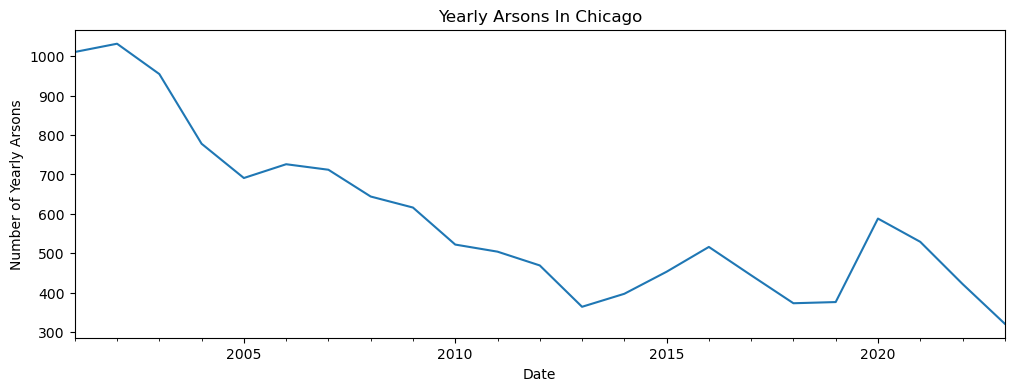

In [61]:
ax = df2["Crime"]["ARSON"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Arsons")
ax.set_xlabel("Date")
ax.set_title("Yearly Arsons In Chicago")

Text(0.5, 1.0, 'Yearly Thefts In Chicago')

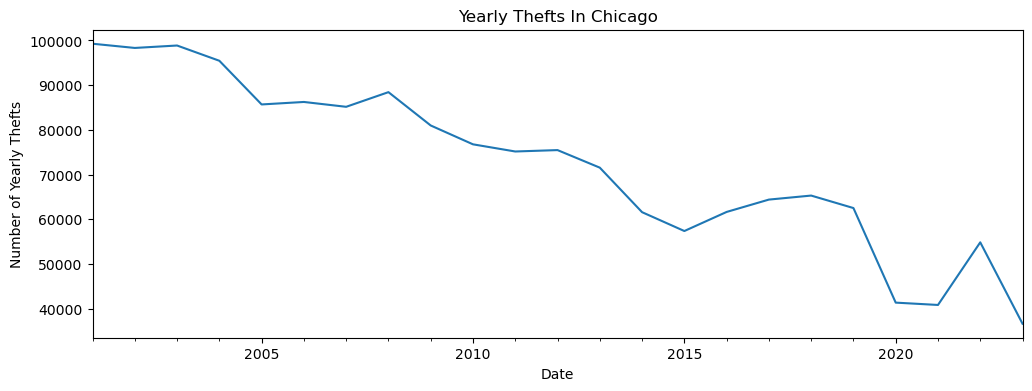

In [62]:
ax = df2["Crime"]["THEFT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Thefts")
ax.set_xlabel("Date")
ax.set_title("Yearly Thefts In Chicago")

Text(0.5, 1.0, 'Yearly Homicides In Chicago')

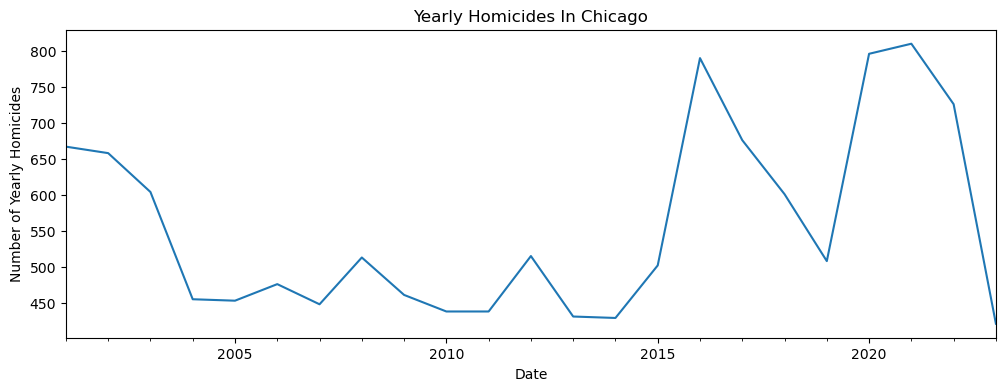

In [63]:
ax = df2["Crime"]["HOMICIDE"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Homicides")
ax.set_xlabel("Date")
ax.set_title("Yearly Homicides In Chicago")

Text(0.5, 1.0, 'Yearly Burglaries In Chicago')

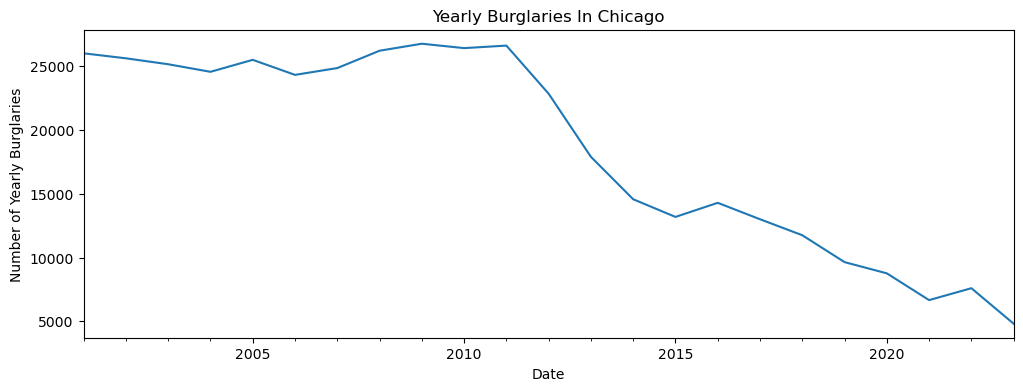

In [65]:
ax = df2["Crime"]["BURGLARY"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Burglaries")
ax.set_xlabel("Date")
ax.set_title("Yearly Burglaries In Chicago")

Text(0.5, 1.0, 'Yearly Assaults In Chicago')

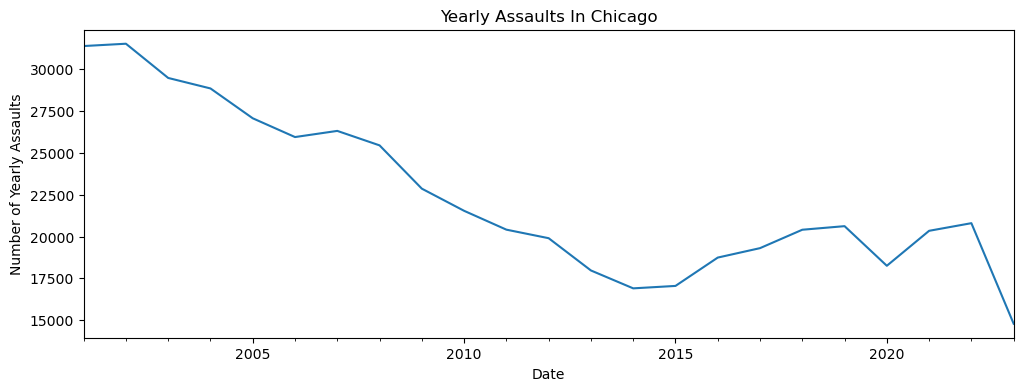

In [66]:
ax = df2["Crime"]["ASSAULT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Assaults")
ax.set_xlabel("Date")
ax.set_title("Yearly Assaults In Chicago")

Text(0.5, 1.0, 'Yearly Weappons Violations In Chicago')

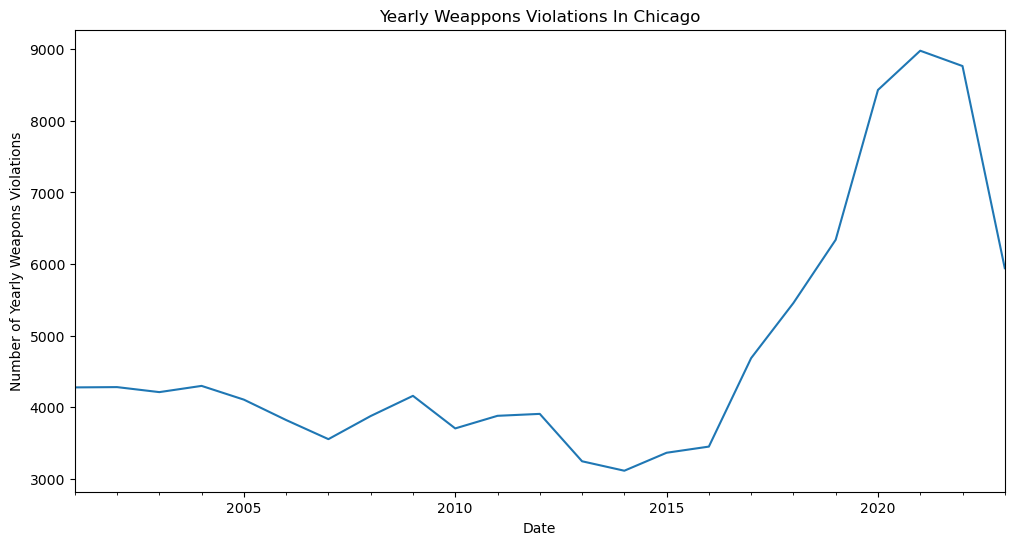

In [67]:
ax = df2["Crime"]["WEAPONS VIOLATION"].plot(figsize=(12,6))
ax.set_ylabel("Number of Yearly Weapons Violations")
ax.set_xlabel("Date")
ax.set_title("Yearly Weappons Violations In Chicago")

In [69]:
df2 = df1.resample("Y").sum()
df2.head(3)

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\2603867796.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df1.resample("Y").sum()


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,
2001-12-31,795260763880,141934,77504,595888814,5513001.0,100920.0,2.020608e+07,-4.233434e+07,485886
2002-12-31,1089755457499,141565,82586,594515174,5550253.0,7972535.0,1.973114e+07,-4.134006e+07,486807
2003-12-31,1350845954742,141588,76582,577403854,5406781.0,10663231.0,1.975184e+07,-4.138487e+07,475985


Text(0.5, 1.0, 'Yearly Crime In Chicago')

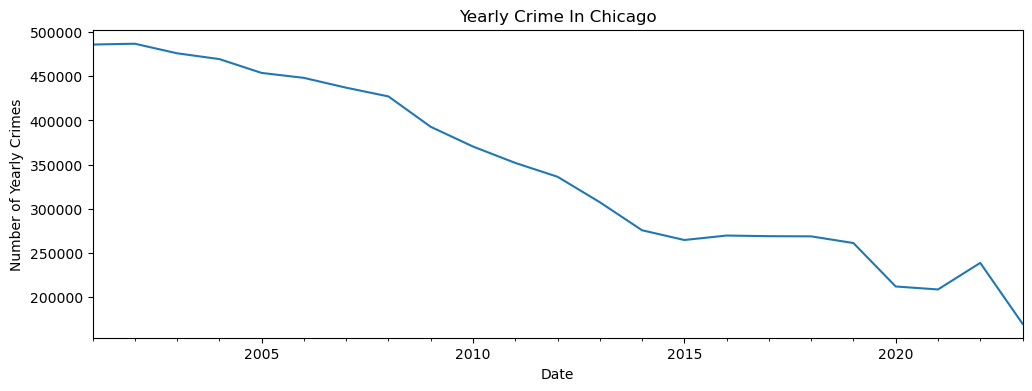

In [70]:
ax = df2["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Yearly Crimes")
ax.set_xlabel("Date")
ax.set_title("Yearly Crime In Chicago")

While overall crime is declining slightly over time. Homicides and weapons violations and gun crime have increased while overall crime has declined.

while most of the crimes have decreased over the years, criminal damage,deceptive practice,other narcotic violation

# Topic 4) Comparing Months:What months have the most crime? What months have the least?Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [71]:
df1 = df1.groupby("Primary Type").resample("M").sum()
df1 = df1.unstack("Primary Type")
df1.head(3)

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\414589470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby("Primary Type").resample("M").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\414589470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby("Primary Type").resample("M").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\414589470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid 

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\414589470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby("Primary Type").resample("M").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\414589470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby("Primary Type").resample("M").sum()
C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\414589470.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid 

ID                                            \
Primary Type        ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                  
2001-01-31     89843098.0  2.862602e+09  8.783277e+09  2.600415e+09   
2001-02-28     78745628.0  2.813532e+09  8.407601e+09  2.312324e+09   
2001-03-31    132751797.0  4.051710e+09  1.102984e+10  2.626386e+09   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 NaN         336247166.0   
2001-02-28                                 NaN         196968724.0   
2001-03-31                                 NaN         226219757.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31      5.322145e+09              36927305.0      1.611806e+09   
2001-02-28      5.097746e+09               1377952.0      1.474270e+09   
2001-03-31      6.645765e+09               6226697.0      1.634591e+09   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31         2.185488e+09  ...        2800.0        563.0   
2001-02-28         1.725406e+09  ...        2488.0        426.0   
2001-03-31         1.982892e+09  ...        2836.0        550.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Date                                                                     
2001-01-31                NaN                  161.0       2.0  1396.0   
2001-02-28                1.0                  173.0       0.0  1159.0   
2001-03-31                0.0                  267.0       2.0  1399.0   

                                                             
Primary Type SEX OFFENSE STALKING   THEFT WEAPONS VIOLATION  
Date                                                         
2001-01-31         218.0     26.0  7867.0             337.0  
2001-02-28         149.0     13.0  6669.0             301.0  
2001-03-31         184.0     17.0  7766.0             345.0  

[3 rows x 324 columns]

Text(0.5, 1.0, 'Monthly Thefts In Chicago')

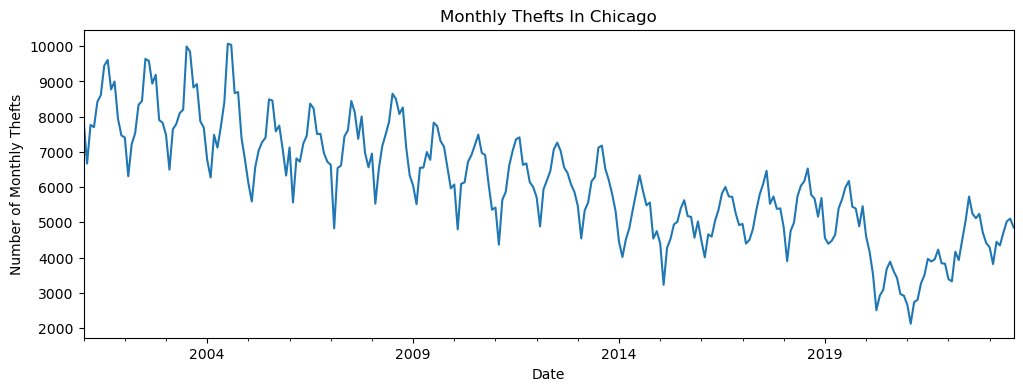

In [72]:
ax = df1["Crime"]["THEFT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago")

Text(0.5, 1.0, 'Monthly Thefts In Chicago In 2022')

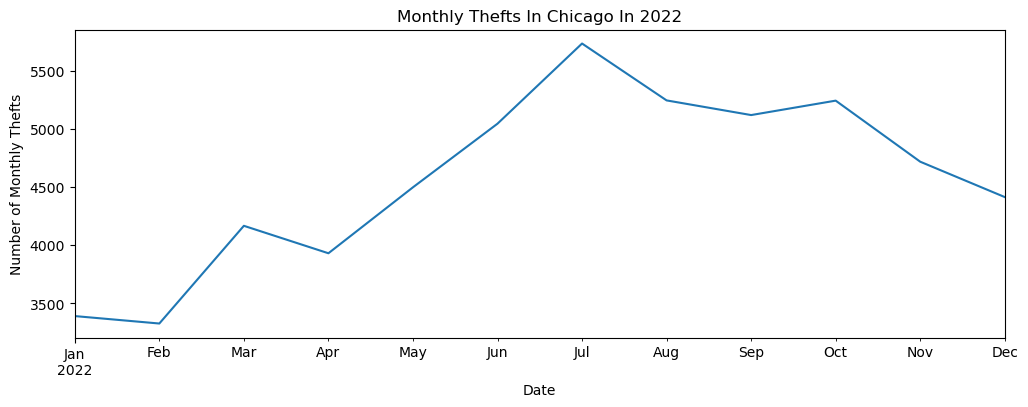

In [73]:
ax = df1["Crime"]["THEFT"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago In 2022")

Text(0.5, 1.0, 'Monthly Thefts In Chicago In 2008')

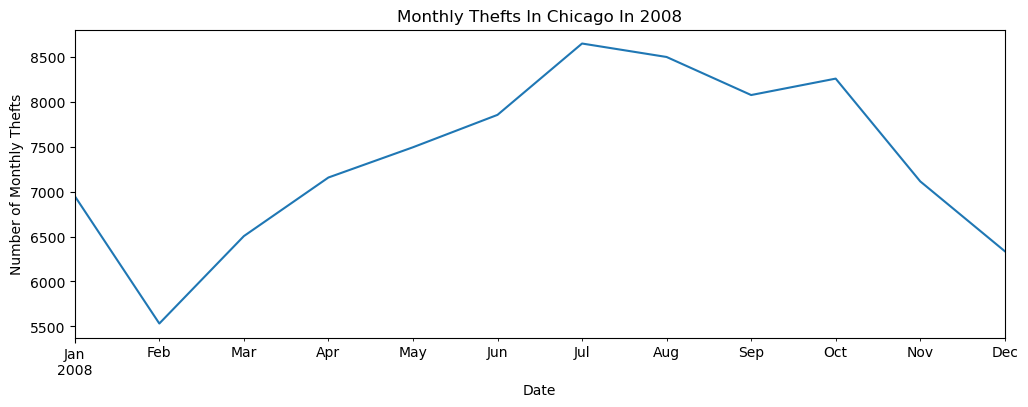

In [74]:
ax = df1["Crime"]["THEFT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Thefts In Chicago In 2001')

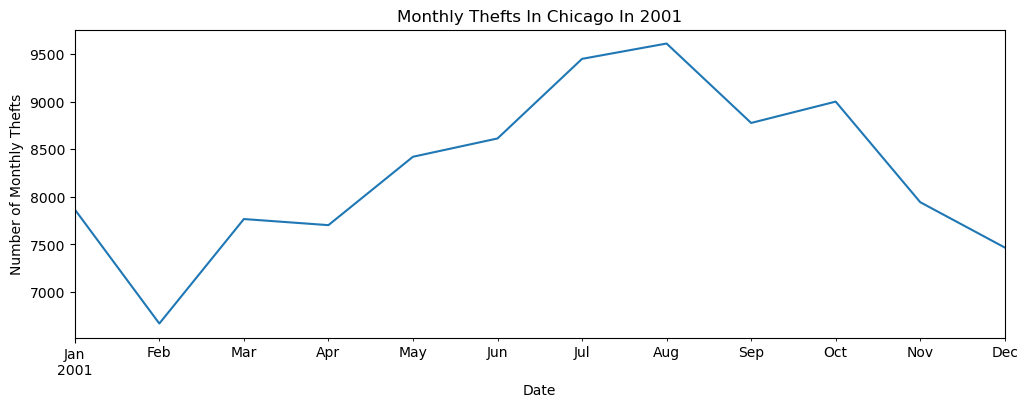

In [75]:
ax = df1["Crime"]["THEFT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_xlabel("Date")
ax.set_title("Monthly Thefts In Chicago In 2001")

july and August represent the months involving the most theft while February has the least number of thefts

Text(0.5, 1.0, 'Monthly Homicides In Chicago')

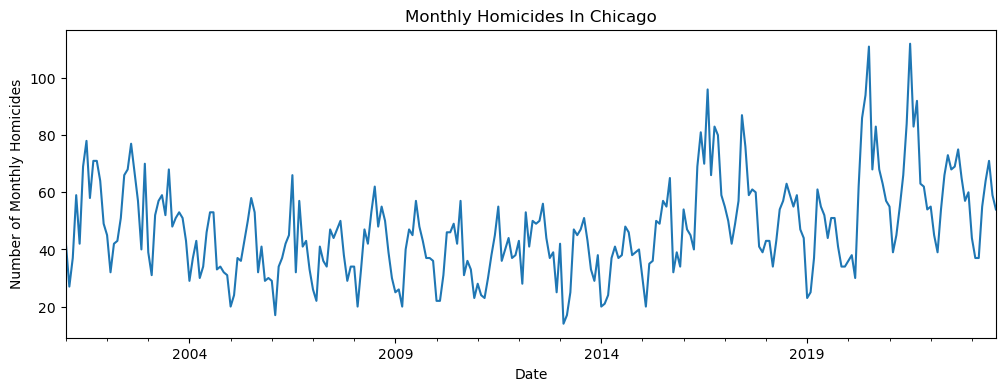

In [76]:
ax = df1["Crime"]["HOMICIDE"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago")

Text(0.5, 1.0, 'Monthly Homicides In Chicago In 2008')

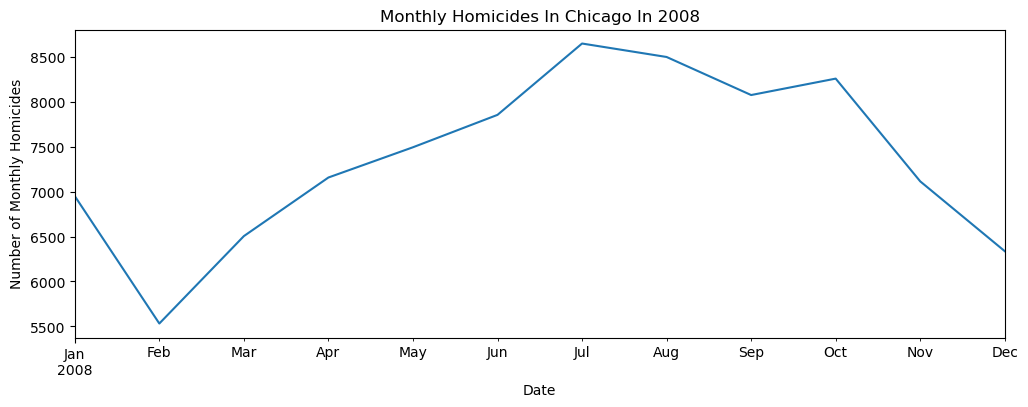

In [77]:
ax = df1["Crime"]["THEFT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Homicides In Chicago In 2001')

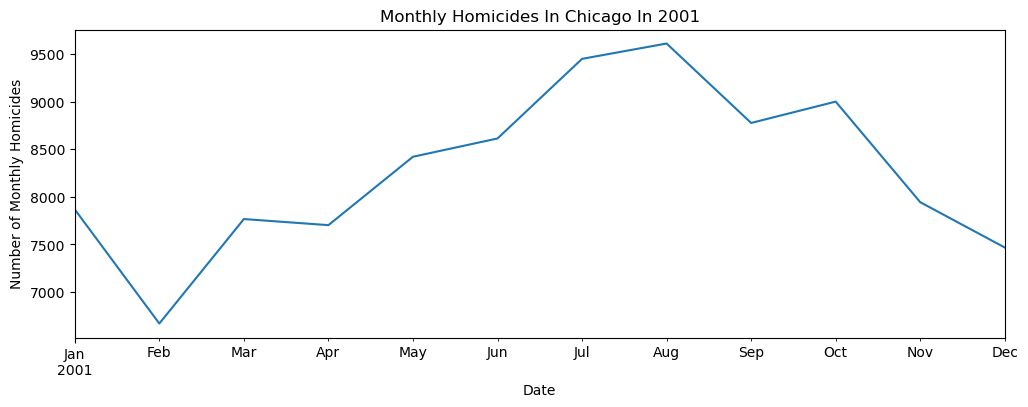

In [78]:
ax = df1["Crime"]["THEFT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Homicides")
ax.set_xlabel("Date")
ax.set_title("Monthly Homicides In Chicago In 2001")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2008')

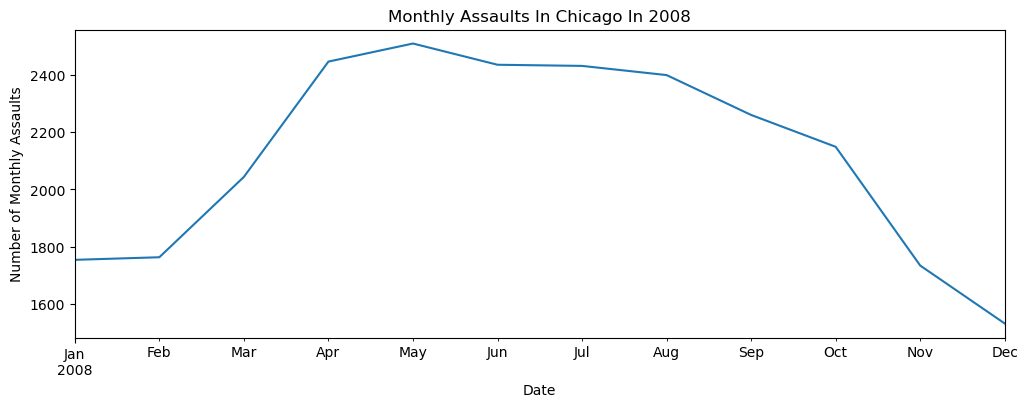

In [80]:
ax = df1["Crime"]["ASSAULT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2001')

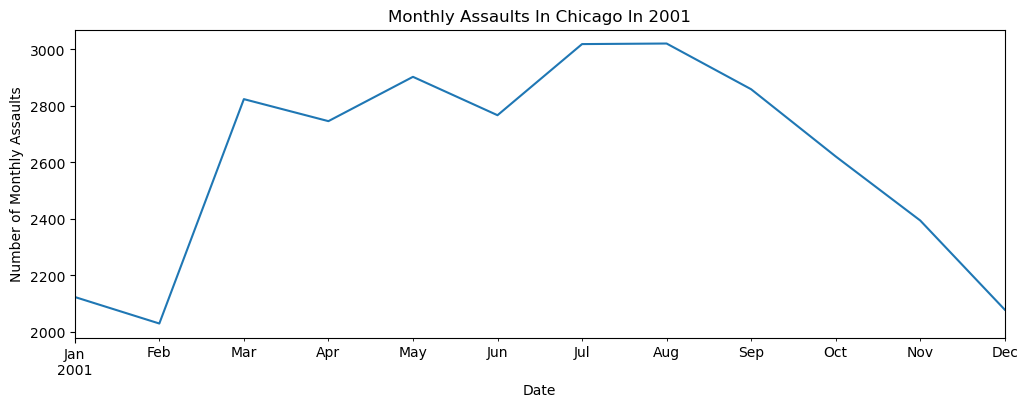

In [82]:
ax = df1["Crime"]["ASSAULT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2001")

In [104]:
ts.head(2)

ID                                            \
Primary Type       ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                 
2001-01-31    89843098.0  2.862602e+09  8.783277e+09  2.600415e+09   
2001-02-28    78745628.0  2.813532e+09  8.407601e+09  2.312324e+09   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 0.0         336247166.0   
2001-02-28                                 0.0         196968724.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31      5.322145e+09              36927305.0      1.611806e+09   
2001-02-28      5.097746e+09               1377952.0      1.474270e+09   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31         2.185488e+09  ...        2800.0        563.0   
2001-02-28         1.725406e+09  ...        2488.0        426.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Date                                                                     
2001-01-31                0.0                  161.0       2.0  1396.0   
2001-02-28                1.0                  173.0       0.0  1159.0   

                                                             
Primary Type SEX OFFENSE STALKING   THEFT WEAPONS VIOLATION  
Date                                                         
2001-01-31         218.0     26.0  7867.0             337.0  
2001-02-28         149.0     13.0  6669.0             301.0  

[2 rows x 324 columns]

In [106]:
ts = ts.resample("M").sum()
ts.head(3)

ID                                            \
Primary Type        ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                  
2001-01-31     89843098.0  2.862602e+09  8.783277e+09  2.600415e+09   
2001-02-28     78745628.0  2.813532e+09  8.407601e+09  2.312324e+09   
2001-03-31    132751797.0  4.051710e+09  1.102984e+10  2.626386e+09   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 0.0         336247166.0   
2001-02-28                                 0.0         196968724.0   
2001-03-31                                 0.0         226219757.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31      5.322145e+09              36927305.0      1.611806e+09   
2001-02-28      5.097746e+09               1377952.0      1.474270e+09   
2001-03-31      6.645765e+09               6226697.0      1.634591e+09   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31         2.185488e+09  ...        2800.0        563.0   
2001-02-28         1.725406e+09  ...        2488.0        426.0   
2001-03-31         1.982892e+09  ...        2836.0        550.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Date                                                                     
2001-01-31                0.0                  161.0       2.0  1396.0   
2001-02-28                1.0                  173.0       0.0  1159.0   
2001-03-31                0.0                  267.0       2.0  1399.0   

                                                             
Primary Type SEX OFFENSE STALKING   THEFT WEAPONS VIOLATION  
Date                                                         
2001-01-31         218.0     26.0  7867.0             337.0  
2001-02-28         149.0     13.0  6669.0             301.0  
2001-03-31         184.0     17.0  7766.0             345.0  

[3 rows x 324 columns]

Text(0.5, 1.0, 'Monthly Assaults In Chicago')

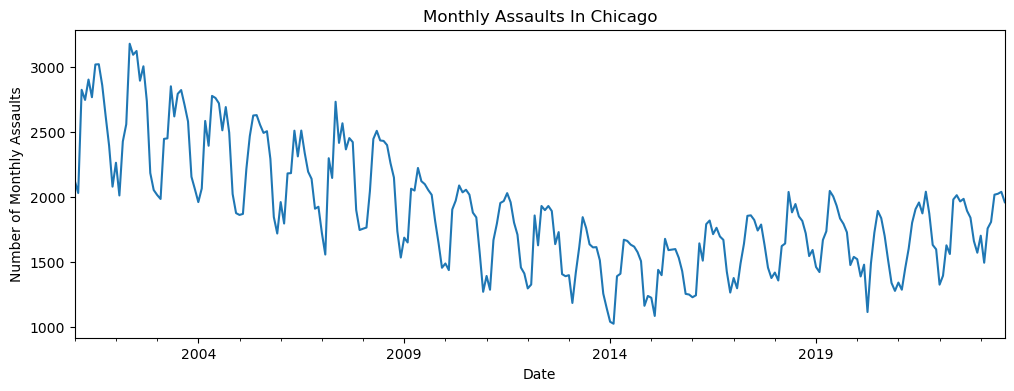

In [108]:
ax = ts["Crime"]["ASSAULT"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2022')

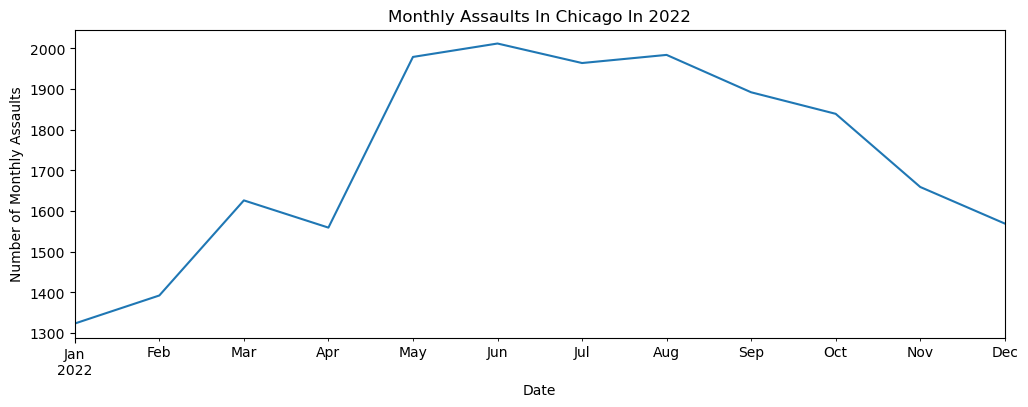

In [109]:
ax = ts["Crime"]["ASSAULT"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2022")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2008')

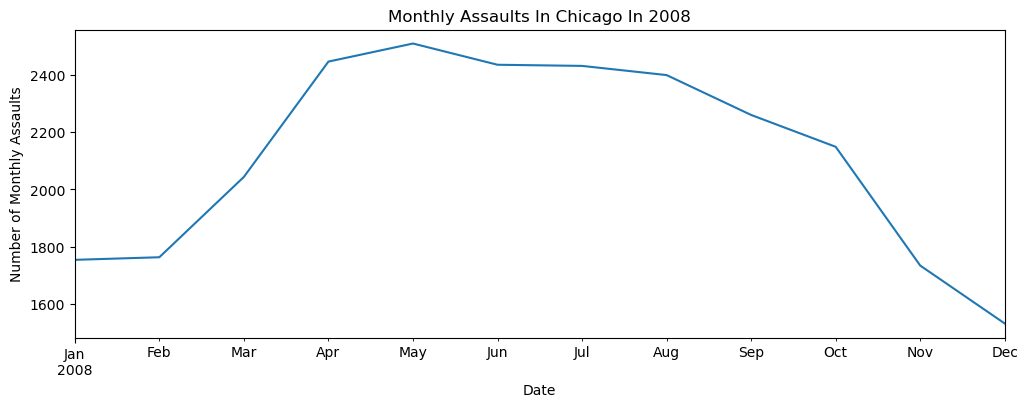

In [110]:
ax = ts["Crime"]["ASSAULT"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2008")

Text(0.5, 1.0, 'Monthly Assaults In Chicago In 2001')

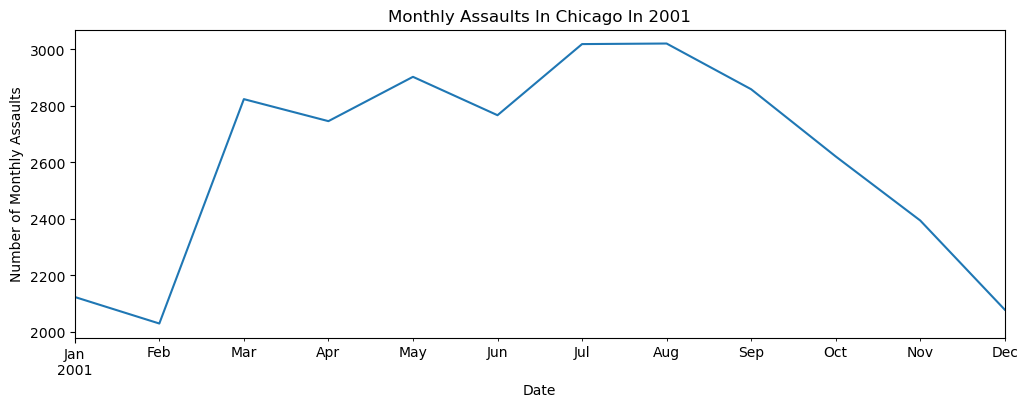

In [111]:
ax = ts["Crime"]["ASSAULT"]["2001"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Assaults")
ax.set_xlabel("Date")
ax.set_title("Monthly Assaults In Chicago In 2001")

In [112]:
ts = df1.resample("M").sum()
ts.head(3)

ID                                            \
Primary Type        ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                  
2001-01-31     89843098.0  2.862602e+09  8.783277e+09  2.600415e+09   
2001-02-28     78745628.0  2.813532e+09  8.407601e+09  2.312324e+09   
2001-03-31    132751797.0  4.051710e+09  1.102984e+10  2.626386e+09   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 0.0         336247166.0   
2001-02-28                                 0.0         196968724.0   
2001-03-31                                 0.0         226219757.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31      5.322145e+09              36927305.0      1.611806e+09   
2001-02-28      5.097746e+09               1377952.0      1.474270e+09   
2001-03-31      6.645765e+09               6226697.0      1.634591e+09   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31         2.185488e+09  ...        2800.0        563.0   
2001-02-28         1.725406e+09  ...        2488.0        426.0   
2001-03-31         1.982892e+09  ...        2836.0        550.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Date                                                                     
2001-01-31                0.0                  161.0       2.0  1396.0   
2001-02-28                1.0                  173.0       0.0  1159.0   
2001-03-31                0.0                  267.0       2.0  1399.0   

                                                             
Primary Type SEX OFFENSE STALKING   THEFT WEAPONS VIOLATION  
Date                                                         
2001-01-31         218.0     26.0  7867.0             337.0  
2001-02-28         149.0     13.0  6669.0             301.0  
2001-03-31         184.0     17.0  7766.0             345.0  

[3 rows x 324 columns]

Text(0.5, 1.0, 'Monthly Crimes In Chicago')

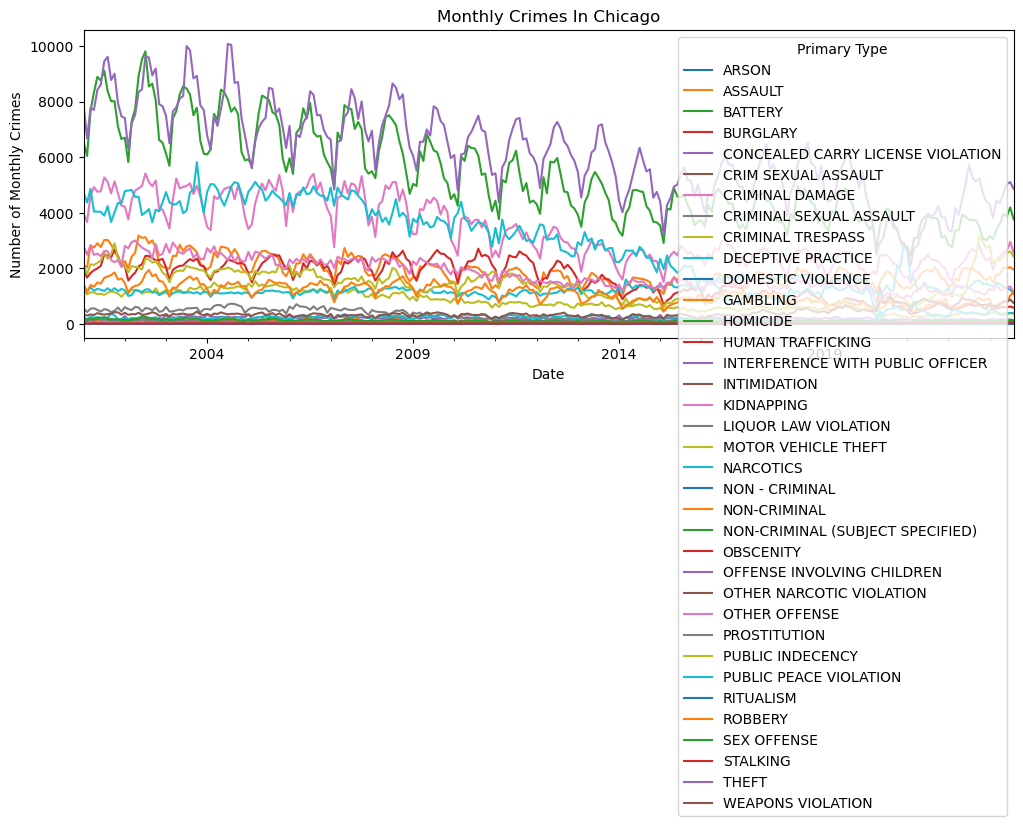

In [119]:
ax = df2["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago")

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\853616141.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = ts["Crime"]["2022"].plot(figsize=(12,4))


Text(0.5, 1.0, 'Monthly Crimes In Chicago In 2022')

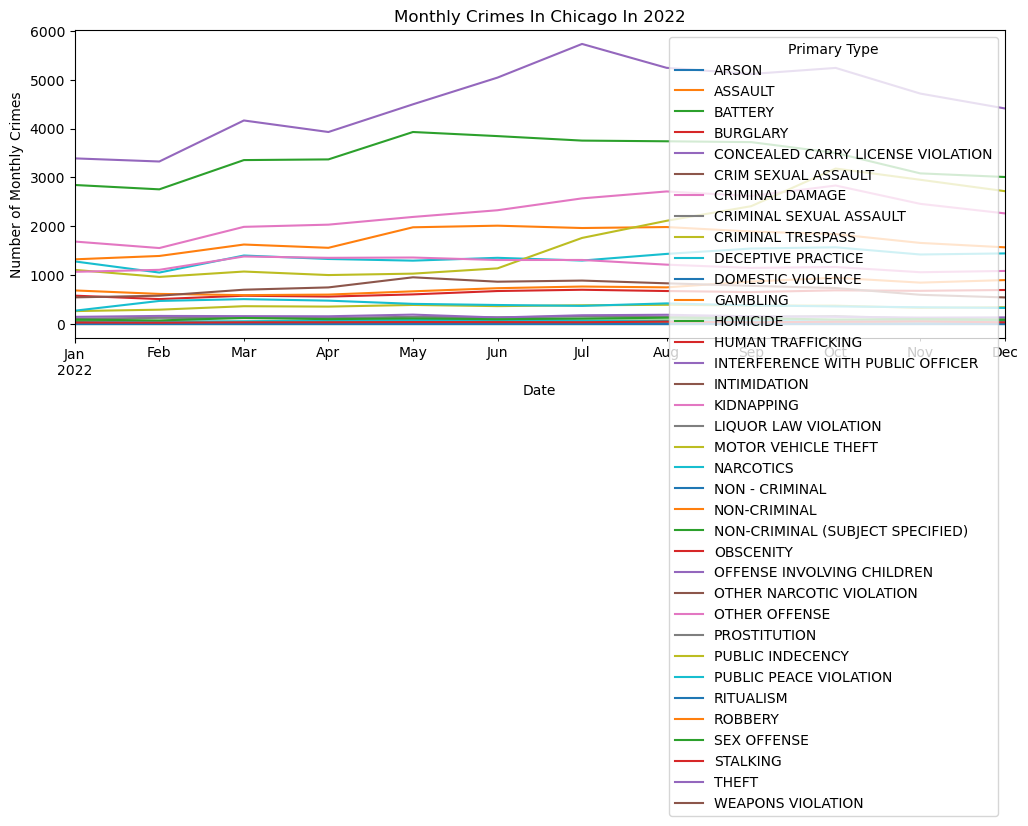

In [116]:
ax = ts["Crime"]["2022"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago In 2022")

so month of july has the maximum  THEFT crime with 164171 number of crimes.

In [123]:
ts = df1.resample("M").sum()
ts

ID                                            \
Primary Type        ARSON       ASSAULT       BATTERY      BURGLARY   
Date                                                                  
2001-01-31     89843098.0  2.862602e+09  8.783277e+09  2.600415e+09   
2001-02-28     78745628.0  2.813532e+09  8.407601e+09  2.312324e+09   
2001-03-31    132751797.0  4.051710e+09  1.102984e+10  2.626386e+09   
2001-04-30    131876621.0  4.084453e+09  1.240563e+10  2.879687e+09   
2001-05-31    144075510.0  4.458790e+09  1.365843e+10  3.081920e+09   
...                   ...           ...           ...           ...   
2023-04-30    469597622.0  2.355822e+10  4.700028e+10  7.749979e+09   
2023-05-31    706132941.0  2.636166e+10  5.171761e+10  8.030934e+09   
2023-06-30    629106057.0  2.652147e+10  5.077255e+10  7.840665e+09   
2023-07-31    552019151.0  2.678674e+10  5.508456e+10  8.268073e+09   
2023-08-31    434822072.0  2.580224e+10  4.956088e+10  7.695861e+09   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Date                                                                 
2001-01-31                                 0.0         336247166.0   
2001-02-28                                 0.0         196968724.0   
2001-03-31                                 0.0         226219757.0   
2001-04-30                                 0.0         219097338.0   
2001-05-31                          12359785.0         266972792.0   
...                                        ...                 ...   
2023-04-30                         156523791.0                 0.0   
2023-05-31                         117704229.0                 0.0   
2023-06-30                         249064449.0                 0.0   
2023-07-31                         275965977.0                 0.0   
2023-08-31                         289835085.0                 0.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Date                                                                     
2001-01-31      5.322145e+09            3.692730e+07      1.611806e+09   
2001-02-28      5.097746e+09            1.377952e+06      1.474270e+09   
2001-03-31      6.645765e+09            6.226697e+06      1.634591e+09   
2001-04-30      7.310540e+09            2.381859e+07      1.681464e+09   
2001-05-31      7.317824e+09            1.367877e+07      1.641703e+09   
...                      ...                     ...               ...   
2023-04-30      3.173657e+10            1.592266e+09      4.735387e+09   
2023-05-31      3.380409e+10            1.962551e+09      5.086869e+09   
2023-06-30      3.449328e+10            1.849320e+09      4.759205e+09   
2023-07-31      3.880064e+10            2.116514e+09      5.191730e+09   
2023-08-31      3.385188e+10            1.805572e+09      4.796285e+09   

                                 ...         Crime               \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Date                             ...                              
2001-01-31         2.185488e+09  ...        2800.0        563.0   
2001-02-28         1.725406e+09  ...        2488.0        426.0   
2001-03-31         1.982892e+09  ...        2836.0        550.0   
2001-04-30         1.881281e+09  ...        2483.0        564.0   
2001-05-31         2.073937e+09  ...        2528.0        503.0   
...                         ...  ...           ...          ...   
2023-04-30         1.860709e+10  ...        1225.0          5.0   
2023-05-31         1.740985e+10  ...        1235.0          5.0   
2023-06-30         1.667542e+10  ...        1327.0         27.0   
2023-07-31         1.622812e+10  ...        1346.0         25.0   
2023-08-31         1.427260e+10  ...        1138.0         13.0   

                                                                       

C:\Users\awot1\AppData\Local\Temp\ipykernel_14980\771324977.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = ts["Crime"]["2008"].plot(figsize=(12,4))


Text(0.5, 1.0, 'Monthly Crimes In Chicago In 2008')

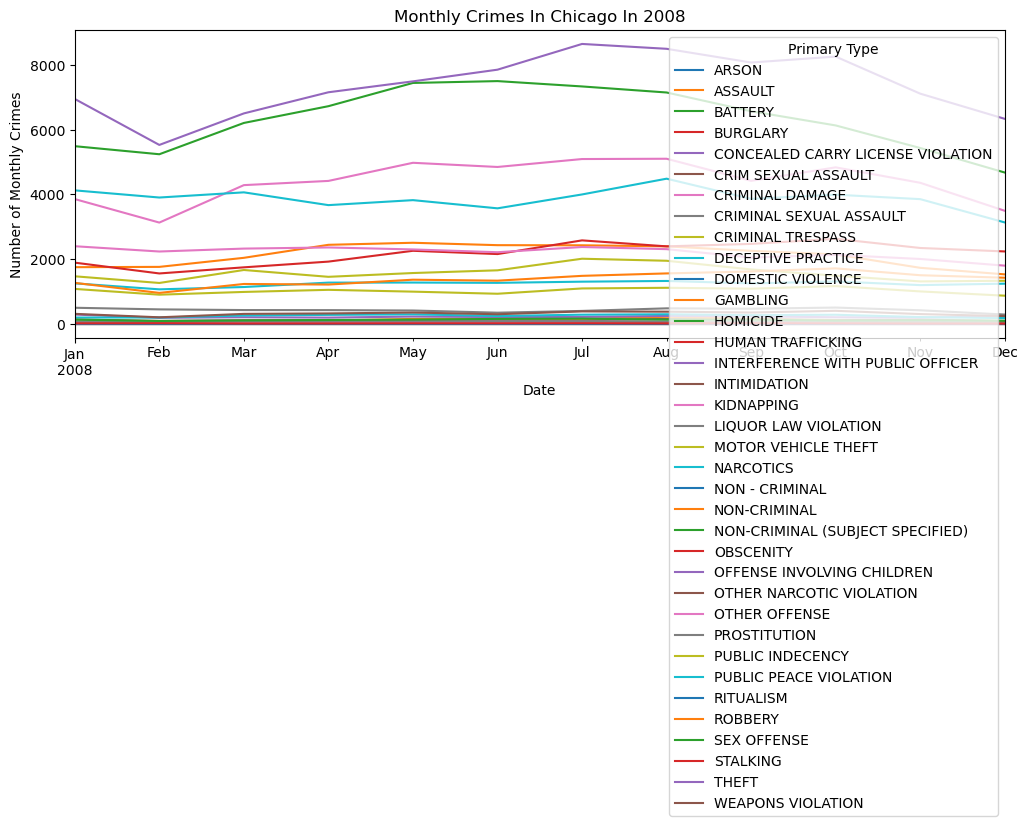

In [126]:
ax = ts["Crime"]["2008"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_xlabel("Date")
ax.set_title("Monthly Crimes In Chicago In 2008")

The highest month in terms of overall crime rates is July.